In [0]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import random

from scipy import misc
from matplotlib import pylab as plt
from scipy.stats import multivariate_normal
from sklearn.datasets import make_spd_matrix
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture as GM

%matplotlib inline

#b)

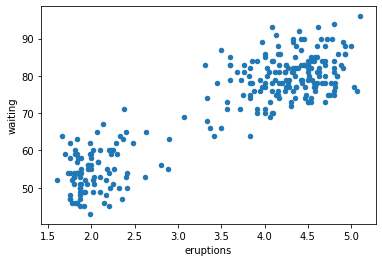

In [7]:
raw_data = pd.read_fwf('http://www.stat.cmu.edu/~larry/all-of-statistics/=data/faithful.dat')
raw_data = pd.DataFrame(raw_data[13:].values, columns=['raw'])
raw_data = raw_data.raw.to_list()

clean_data = list()
for row in raw_data:
  row = row.split(" ")[1:]
  new_row = list()
  for elem in row:
    if len(elem) > 0:
      if '.' in elem:
        new_row.append(float(elem))
      else:
        new_row.append(int(elem))
  clean_data.append(new_row)

cols = ["eruptions", "waiting"]
train_data = pd.DataFrame(data=clean_data, columns=cols)
ax1 = train_data.plot.scatter(x='eruptions', y='waiting')

In [8]:
train_data.head(10)

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85
5,2.883,55
6,4.700,88
7,3.600,85
8,1.950,51
9,4.350,85


#c)

In [9]:
total_means = list()
init_means = np.array([[80, 2], [60, 4.5]]).T

for i in range(1, 10):
  gmm_model = GM(2, covariance_type="spherical", means_init = init_means, tol=1e-5, max_iter=i)
  gmm_model.fit(train_data.values)
  total_means.append(gmm_model.means_)

/usr/local/lib/python3.6/dist-packages/sklearn/mixture/base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/mixture/base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/mixture/base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/mixture/base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/usr/local/lib/p

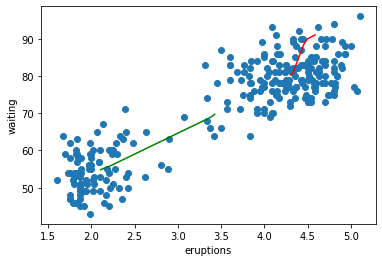

In [10]:
plt.scatter(train_data["eruptions"], train_data["waiting"])
plt.xlabel("eruptions")
plt.ylabel("waiting")

mean_0_0 = [entry[0,0] for entry in total_means]
mean_0_1 = [entry[0,1] for entry in total_means]
mean_1_0 = [entry[1,0] for entry in total_means]
mean_1_1 = [entry[1,1] for entry in total_means]

plt.plot(mean_0_0, mean_0_1, c='r') 
plt.plot(mean_1_0, mean_1_1, c='g')

(array([ 3.,  6.,  3.,  8.,  6.,  4., 12.,  7.,  0.,  1.]),
 array([ 5. ,  6.1,  7.2,  8.3,  9.4, 10.5, 11.6, 12.7, 13.8, 14.9, 16. ]),
 <a list of 10 Patch objects>)

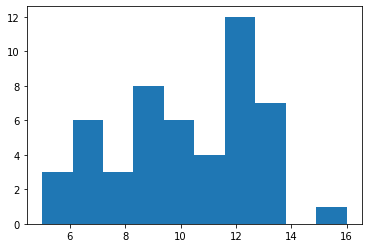

In [11]:
total_count = []

for i in range(0, 50): 
  randk = np.random.choice(train_data.values.shape[0], 2, replace=False)
  init_means = train_data.values[randk]
  gmm_model = GM(2, covariance_type="spherical", init_params="random", tol=1e-5, means_init=init_means)
  gmm_model.fit(train_data.values)
  total_count.append(gmm_model.n_iter_)

plt.hist(total_count)

#d)

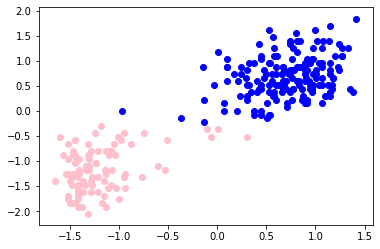

In [14]:
# Code implementation courtesy of https://github.com/WeimingZhang/CS5785-Applied-Machine-Learning/blob/master/Homework3/Question2.ipynb
X_std = StandardScaler().fit_transform(train_data)
km = KMeans(n_clusters=2, random_state=150).fit_predict(train_data)

plt.figure(1)
plt.scatter(X_std[km == 0][:,0], X_std[km == 0][:,1], c='pink')
plt.scatter(X_std[km == 1][:,0], X_std[km == 1][:,1], c=u'b')